In [164]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import glob as gb
import tensorflow as tf

In [165]:
size=94 #size of the image
train_dir='.\\Eye dataset'

train_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.1,
).flow_from_directory(train_dir,batch_size=32,target_size=(size,size),subset="training",shuffle=True)

Found 10153 images belonging to 4 classes.


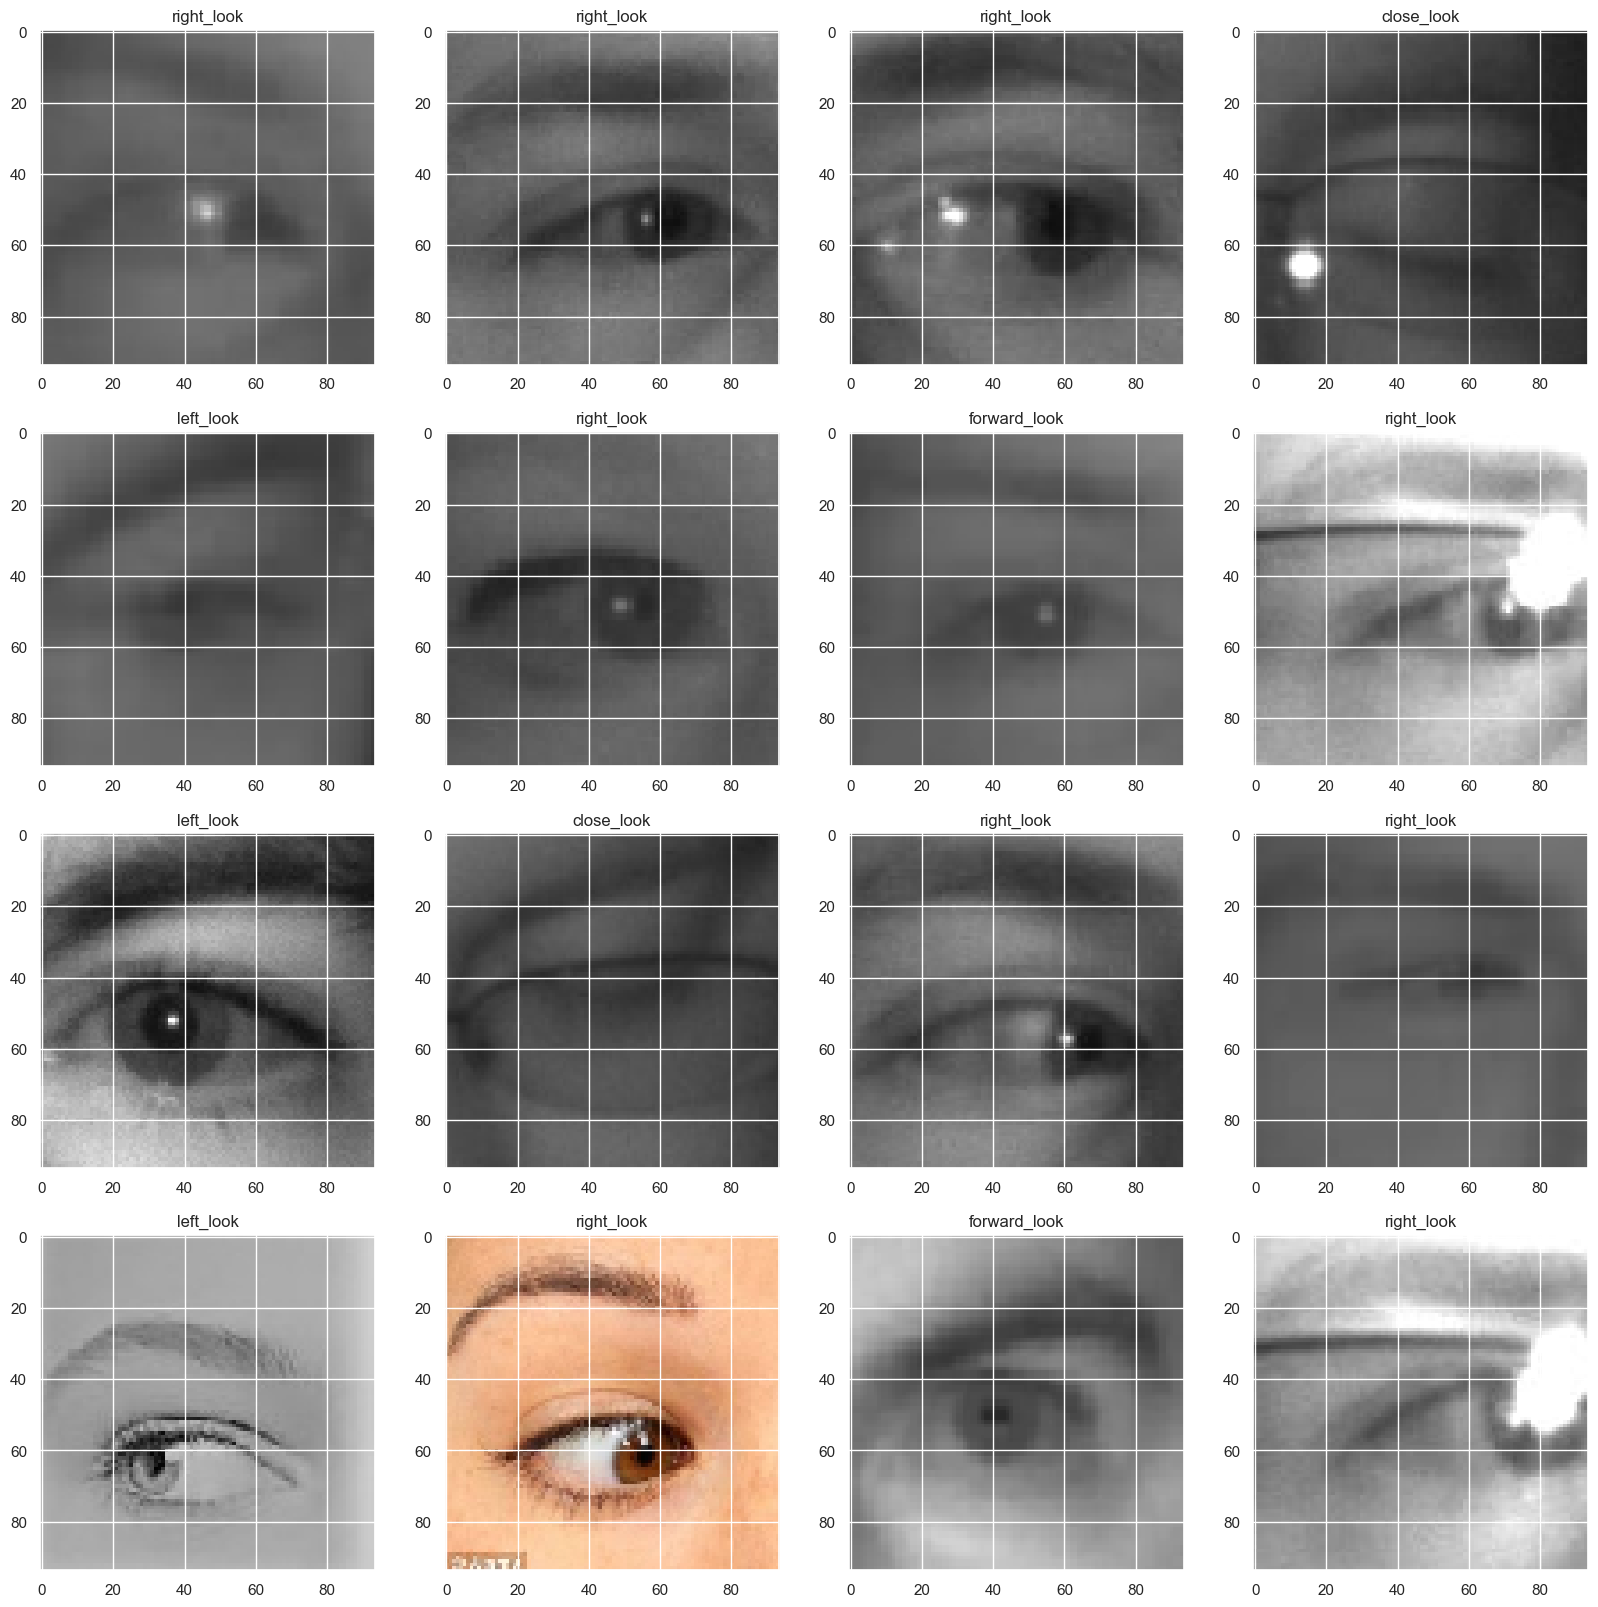

In [166]:
classes=list(train_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in train_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [167]:
valid_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2,
).flow_from_directory(train_dir,batch_size=32,target_size=(size,size),subset='validation',shuffle=True)

Found 2255 images belonging to 4 classes.


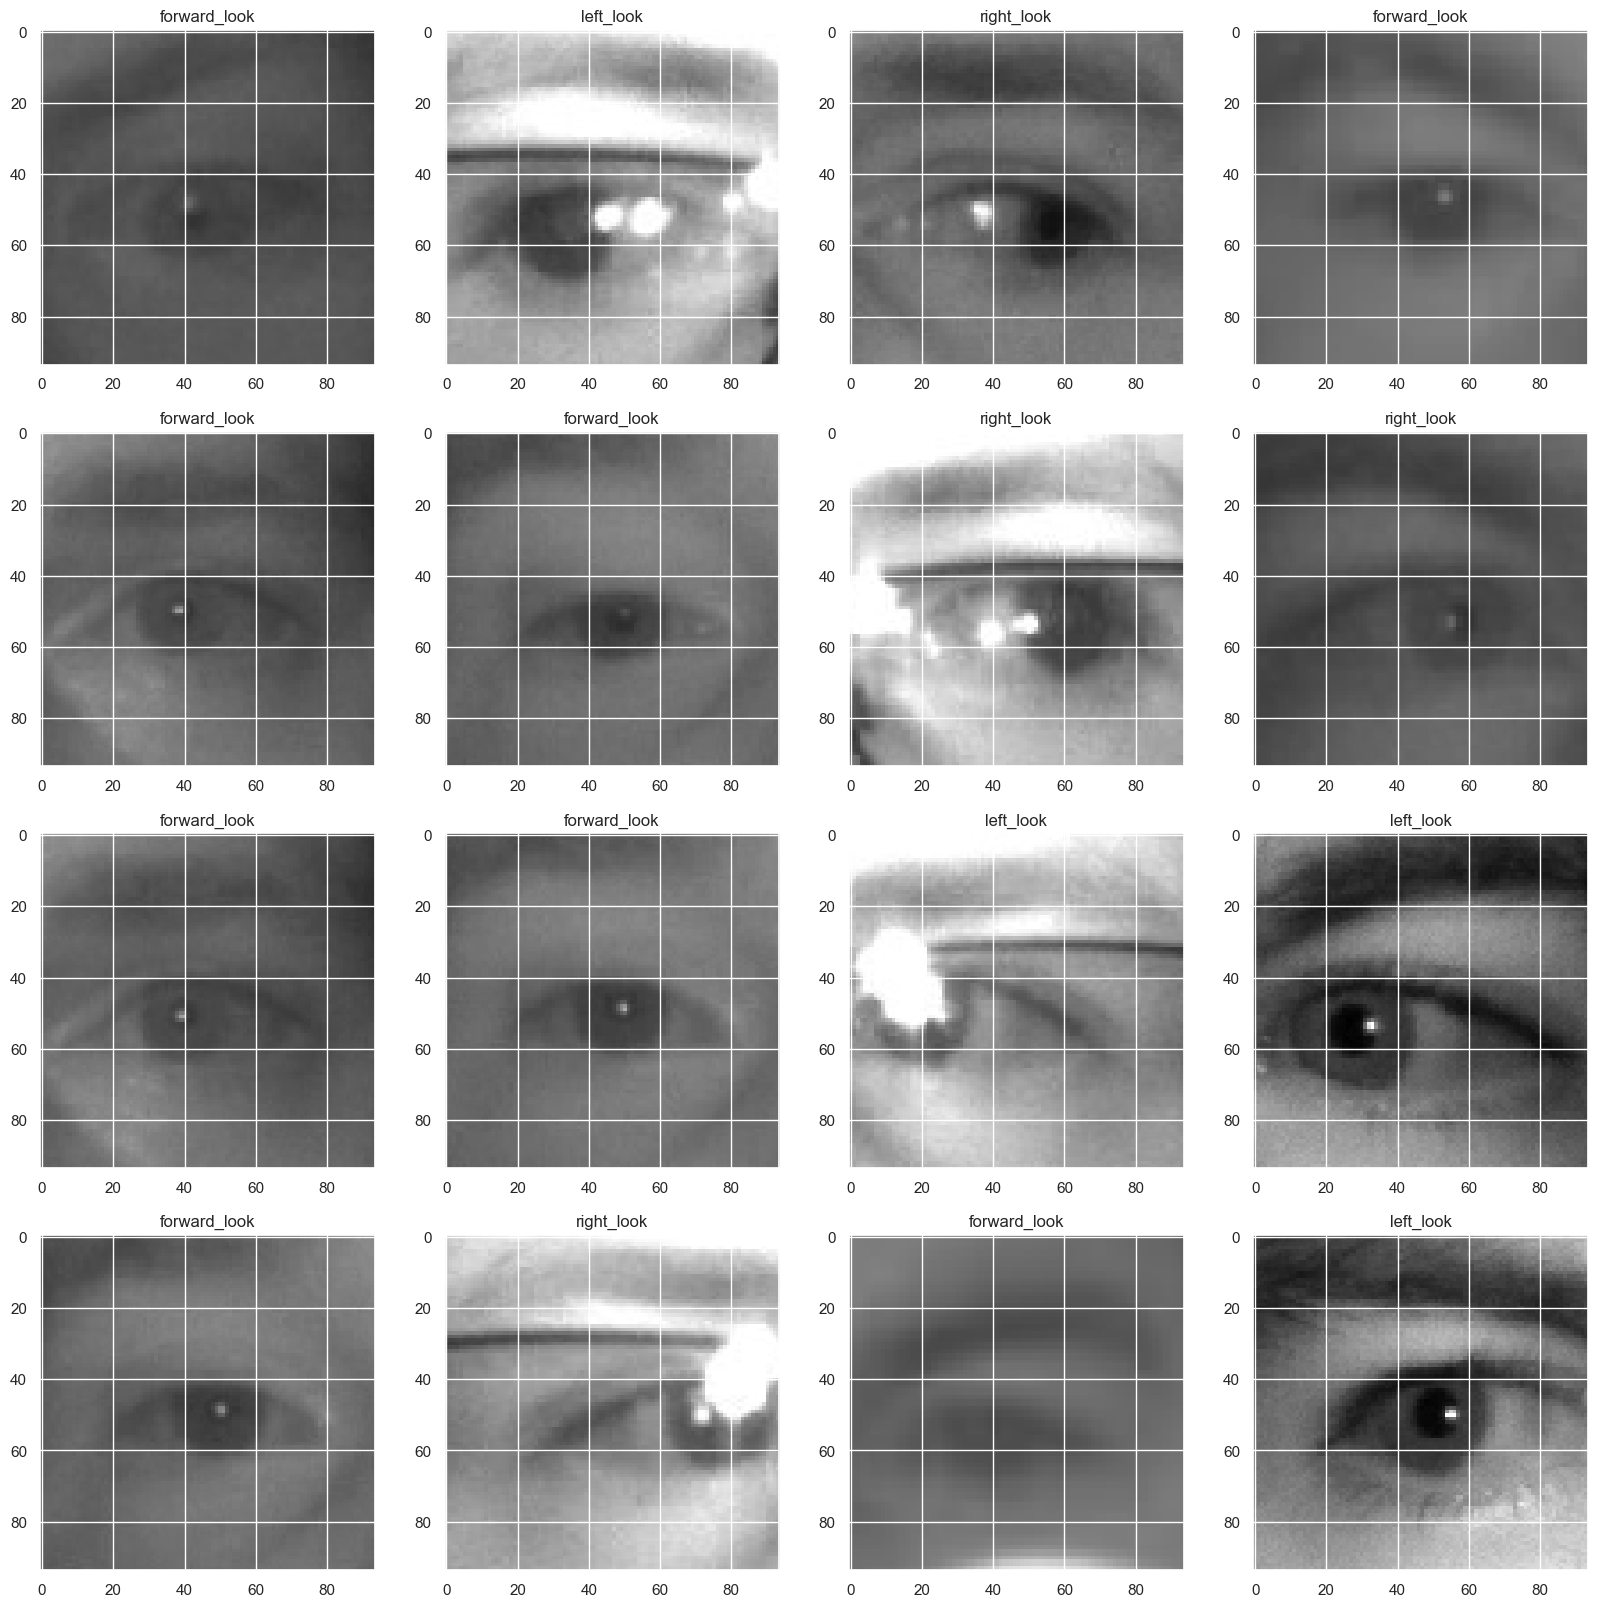

In [168]:
classes=list(valid_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in valid_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [169]:
test_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1/255.0,
    validation_split=0.2
).flow_from_directory(train_dir,batch_size=32,target_size=(size,size),subset='validation',shuffle=True)


Found 2255 images belonging to 4 classes.


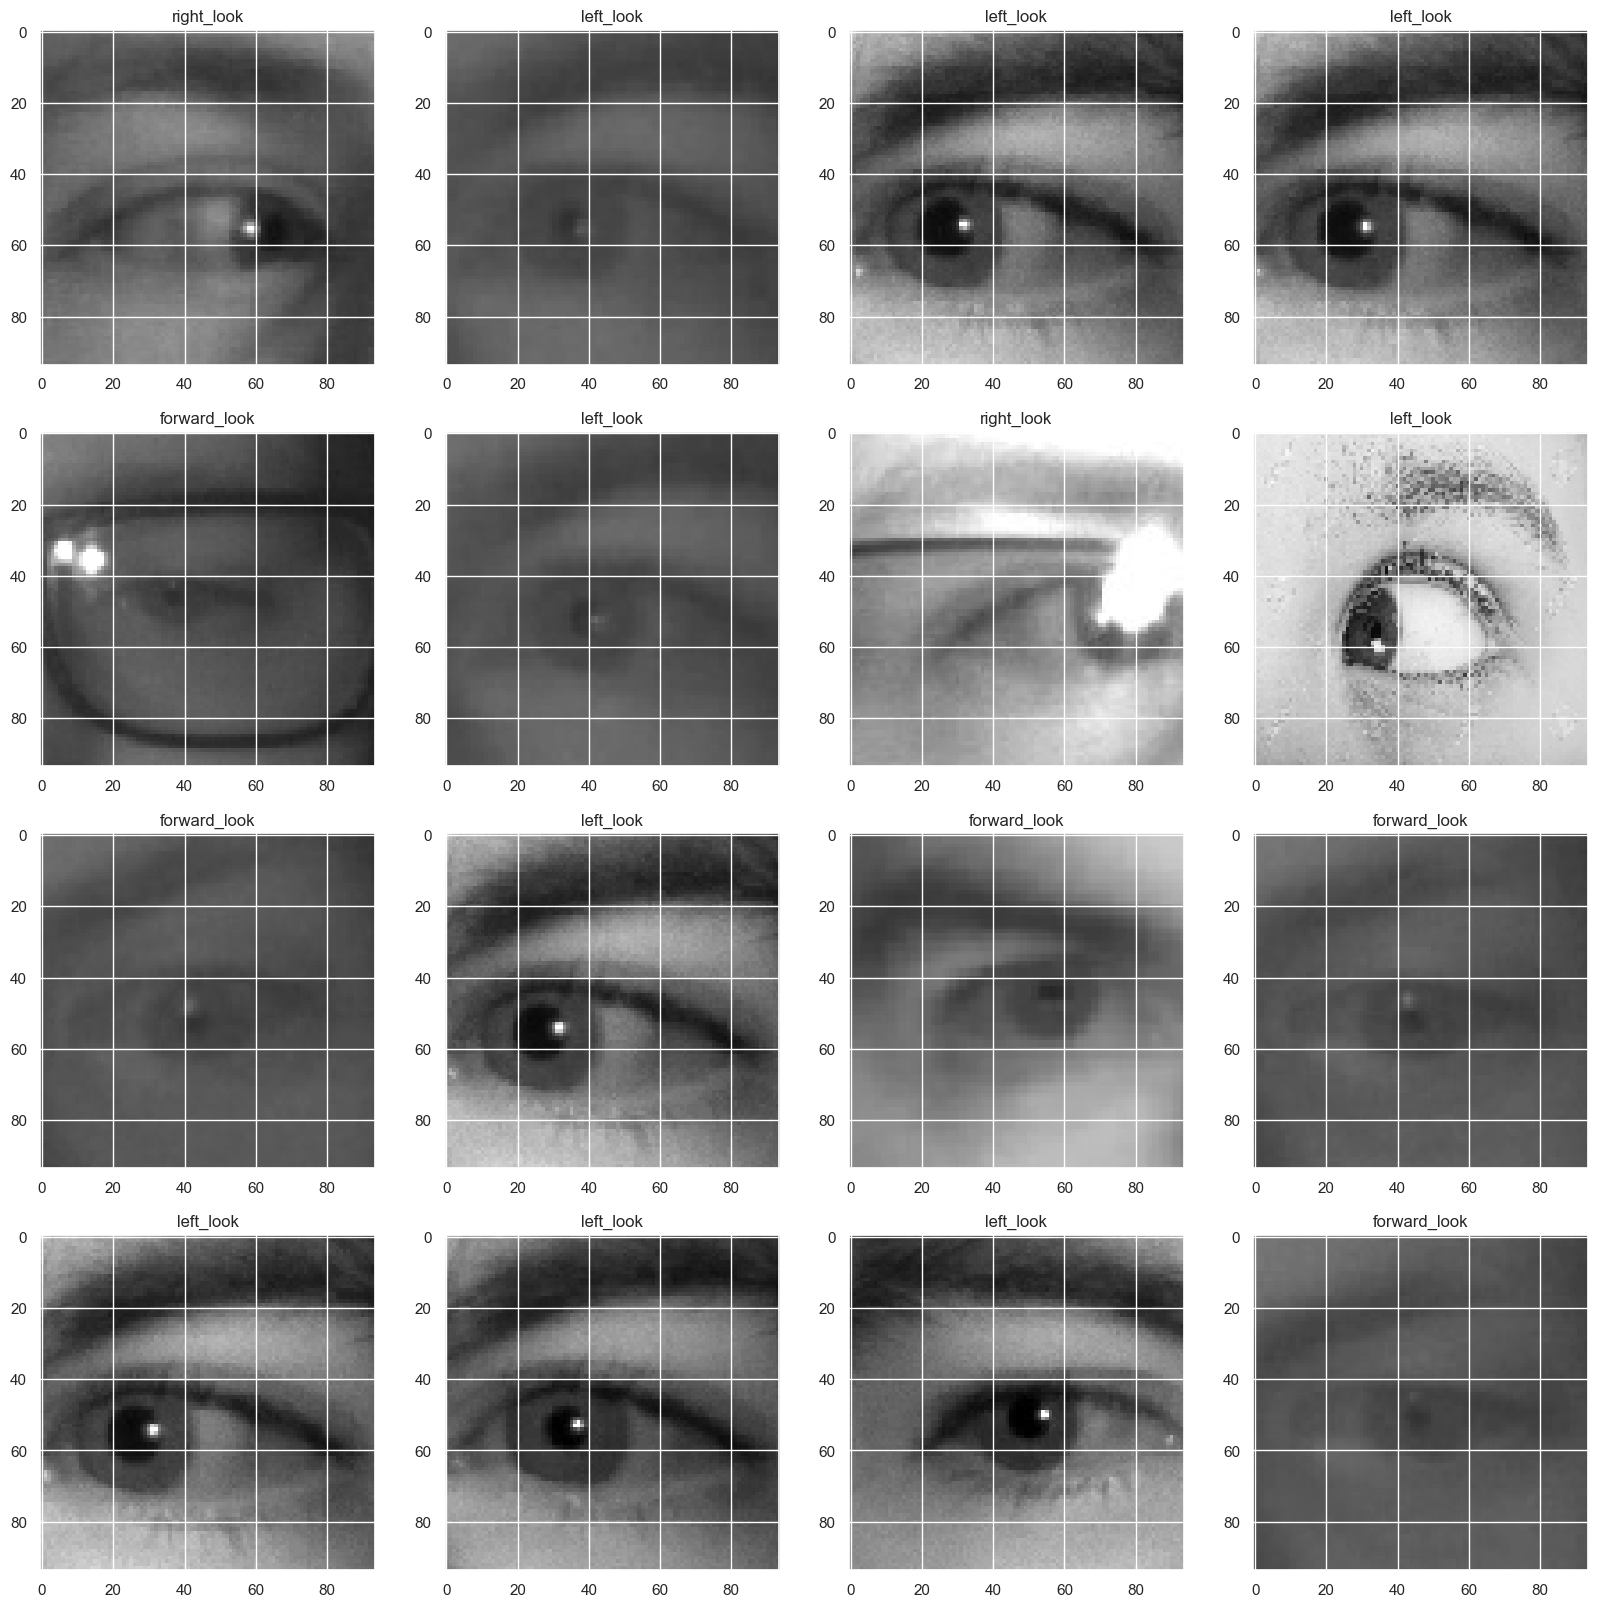

In [170]:
classes=list(test_generator.class_indices.keys())
plt.figure(figsize=(20,20))
for X_batch, y_batch in test_generator:
    # create a grid of 3x3 images
    for i in range(0,16):
        plt.subplot(4,4,i+1)
        plt.imshow(X_batch[i])
        plt.title(classes[np.where(y_batch[i]==1)[0][0]])
    # show the plot
    plt.show()
    break

In [171]:
classes

['close_look', 'forward_look', 'left_look', 'right_look']

In [172]:
from keras.models import Sequential 
from keras.layers import Dense ,Flatten ,Conv2D ,MaxPooling2D ,Dropout ,BatchNormalization ,GlobalMaxPool2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping ,ReduceLROnPlateau ,ModelCheckpoint

In [173]:
optimizer_adam=Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.99)

In [174]:
EarlyStop=EarlyStopping(patience=18,restore_best_weights=True)
Reduce_LR=ReduceLROnPlateau(monitor='val_accuracy',verbose=2,factor=0.5,min_lr=0.00001)
model_check=ModelCheckpoint('model.keras',monitor='val_loss',verbose=1,save_best_only=True)
callback=[EarlyStop , Reduce_LR,model_check]

In [175]:
model = Sequential([
    Conv2D(32, 3, activation='relu',  kernel_initializer='he_normal', input_shape=(size, size, 3)),
    Conv2D(64, 3, activation='relu',  kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(3),

    Conv2D(128, 3, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(3),

    Conv2D(256, 3, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D(3),

    Flatten(),
    Dense(64, activation='relu', kernel_initializer='he_normal'),
    BatchNormalization(),
    Dense(4, activation='softmax', kernel_initializer='glorot_normal')
])
'''
Conv2D(32, 3): This is a 2D convolutional layer with 32 filters and a kernel size of 3x3.
        activation='relu': The ReLU (Rectified Linear Unit) activation function introduces non-linearity into the model.
        kernel_initializer='he_normal': This initializes the weights using He normal initialization, which is suitable for layers with ReLU activation.
        input_shape=(size, size, 3): The input shape specifies that the input images are of size (size×size) with 3 color channels (RGB).

Conv2D(64, 3, activation='relu', kernel_initializer='he_normal'): Another 2D convolutional layer with 64 filters and a kernel size of 3x3.
        Uses ReLU activation and He normal initialization for weights.

BatchNormalization(): This layer normalizes the output of the previous layer to have zero mean and unit variance, which can help stabilize and accelerate training.

MaxPooling2D(3): This layer performs max pooling with a 3x3 window, which reduces the spatial dimensions of the input (downsampling).

---------+---------

Conv2D(128, 3, activation='relu', kernel_initializer='he_normal'): A 2D convolutional layer with 128 filters and a kernel size of 3x3.
        Uses ReLU activation and He normal initialization for weights.

BatchNormalization():Normalizes the output of the previous layer.

MaxPooling2D(3):Max pooling with a 3x3 window to further reduce spatial dimensions.

---------+---------

Conv2D(256, 3, activation='relu', kernel_initializer='he_normal'):A 2D convolutional layer with 256 filters and a kernel size of 3x3.
        Uses ReLU activation and He normal initialization for weights.

BatchNormalization():Normalizes the output of the previous layer.

MaxPooling2D(3):Max pooling with a 3x3 window to further reduce spatial dimensions.

---------+---------

Flatten():Flattens the 3D output of the previous layer to a 1D vector, preparing it for the dense (fully connected) layers.

Dense(64, activation='relu', kernel_initializer='he_normal'):A fully connected (dense) layer with 64 units.
        Uses ReLU activation and He normal initialization for weights.

BatchNormalization():Normalizes the output of the previous layer.

Dense(4, activation='softmax', kernel_initializer='glorot_normal'):The output layer with 4 units, one for each class.
        Uses the softmax activation function, which is typically used for multi-class classification, converting the outputs to probability distributions.
        Initializes the weights using Glorot normal initialization, which is commonly used for the output layer.

'''

"\nConv2D(32, 3): This is a 2D convolutional layer with 32 filters and a kernel size of 3x3.\n        activation='relu': The ReLU (Rectified Linear Unit) activation function introduces non-linearity into the model.\n        kernel_initializer='he_normal': This initializes the weights using He normal initialization, which is suitable for layers with ReLU activation.\n        input_shape=(size, size, 3): The input shape specifies that the input images are of size (size×size) with 3 color channels (RGB).\n\nConv2D(64, 3, activation='relu', kernel_initializer='he_normal'): Another 2D convolutional layer with 64 filters and a kernel size of 3x3.\n        Uses ReLU activation and He normal initialization for weights.\n\nBatchNormalization(): This layer normalizes the output of the previous layer to have zero mean and unit variance, which can help stabilize and accelerate training.\n\nMaxPooling2D(3): This layer performs max pooling with a 3x3 window, which reduces the spatial dimensions of t

In [176]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 92, 92, 32)        896       
                                                                 
 conv2d_37 (Conv2D)          (None, 90, 90, 64)        18496     
                                                                 
 batch_normalization_36 (Ba  (None, 90, 90, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_38 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 batch_normalization_37 (Ba  (None, 28, 28, 128)      

In [177]:
model.compile(optimizer=optimizer_adam,loss='categorical_crossentropy',metrics=['accuracy'])

In [178]:
history=model.fit(train_generator,validation_data=valid_generator,epochs=50,batch_size=16,
                  steps_per_epoch=len(train_generator)//16,validation_steps=len(valid_generator)//16,
                  callbacks=callback, verbose=1)
model.save('model.keras')

Epoch 1/50
19/19 [==============================] - ETA: 0s - loss: 1.2510 - accuracy: 0.4786
Epoch 1: val_loss improved from inf to 1.36590, saving model to model.keras
19/19 [==============================] - 4s 129ms/step - loss: 1.2510 - accuracy: 0.4786 - val_loss: 1.3659 - val_accuracy: 0.3438 - lr: 1.0000e-04
Epoch 2/50
19/19 [==============================] - ETA: 0s - loss: 0.8404 - accuracy: 0.6974
Epoch 2: val_loss improved from 1.36590 to 1.33152, saving model to model.keras
19/19 [==============================] - 2s 115ms/step - loss: 0.8404 - accuracy: 0.6974 - val_loss: 1.3315 - val_accuracy: 0.3672 - lr: 1.0000e-04
Epoch 3/50
19/19 [==============================] - ETA: 0s - loss: 0.6152 - accuracy: 0.7862
Epoch 3: val_loss did not improve from 1.33152
19/19 [==============================] - 2s 112ms/step - loss: 0.6152 - accuracy: 0.7862 - val_loss: 1.3446 - val_accuracy: 0.2891 - lr: 1.0000e-04
Epoch 4/50
19/19 [==============================] - ETA: 0s - loss: 0.5

Model may be overfitting


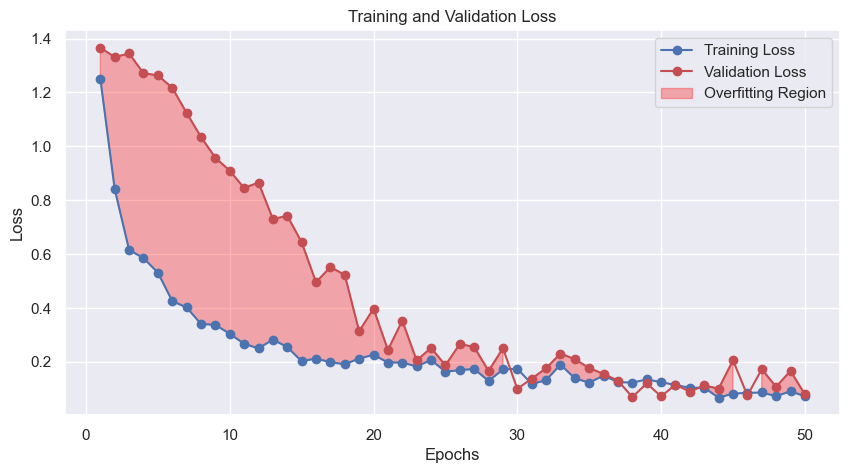

In [188]:
import matplotlib.pyplot as plt

def check_overfitting(history):
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    # Check for overfitting
    if val_loss[-1] > train_loss[-1]:
        print("Model may be overfitting")
    else:
        print("Model is not overfitting")
    
    # Plotting
    epochs = range(1, len(train_loss) + 1)
    plt.figure(figsize=(10, 5))
    
    # Plot train and validation loss
    plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    
    # Fill color segments for overfitting indication
    plt.fill_between(epochs, train_loss, val_loss, where=(np.array(val_loss) > np.array(train_loss)), 
                     color='red', alpha=0.3, label='Overfitting Region')
    
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


check_overfitting(history)

In [189]:
#plotting training values
import seaborn as sns
sns.set()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

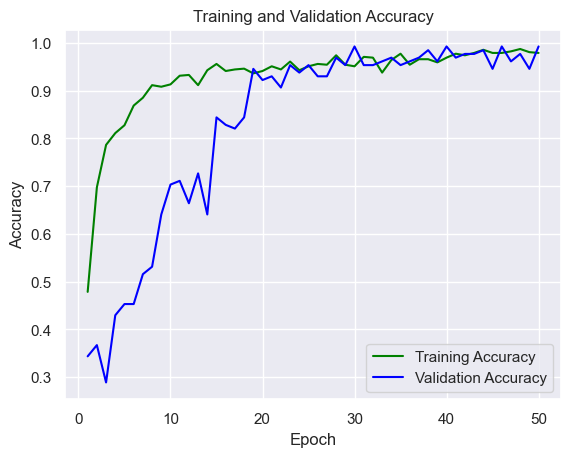

In [180]:
#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

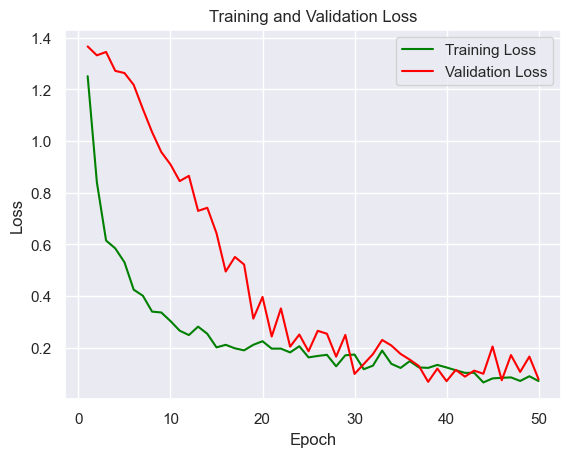

In [181]:
#loss plot
plt.plot(epochs, loss, color='green', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

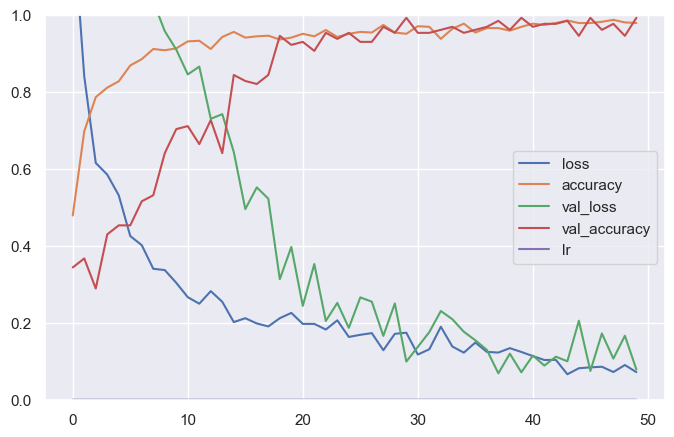

In [182]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

1/1 [==============================] - 0s 18ms/step


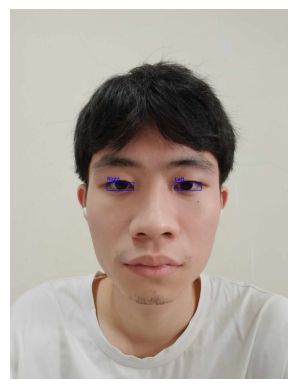

1/1 [==============================] - 0s 17ms/step


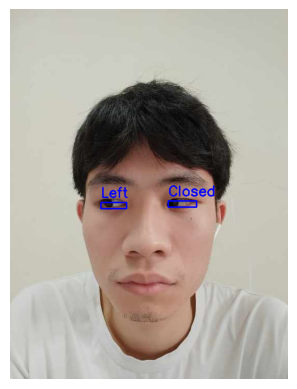

1/1 [==============================] - 0s 19ms/step


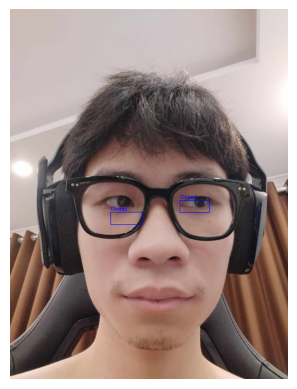

1/1 [==============================] - 0s 29ms/step


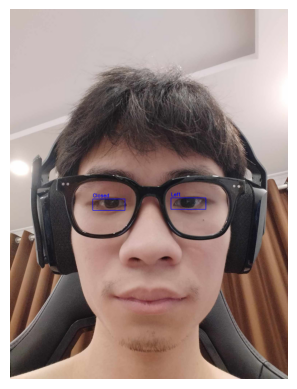

1/1 [==============================] - 0s 18ms/step


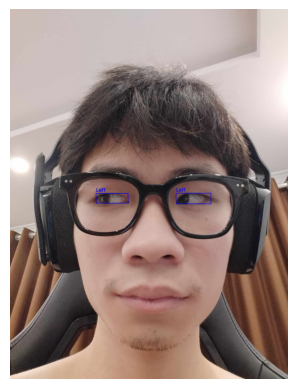

1/1 [==============================] - 0s 16ms/step


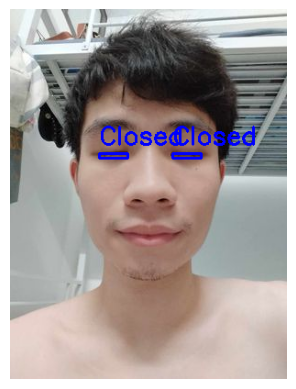

1/1 [==============================] - 0s 18ms/step


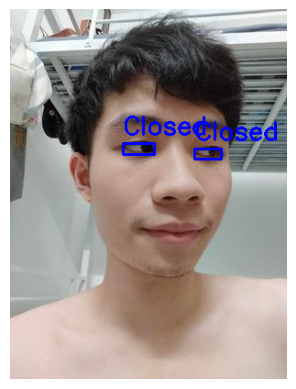

1/1 [==============================] - 0s 18ms/step


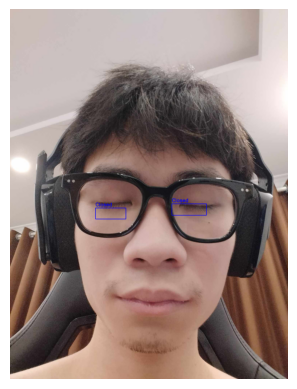

In [207]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

# Load your trained model
model_keras = load_model('model.keras')

# Initialize dlib's face detector (HOG-based) and facial landmarks predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Function to detect facial landmarks and extract eye regions
def detect_eyes_dlib(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = detector(gray)
    eyes = []
    for face in faces:
        landmarks = predictor(gray, face)
        # Extracting the coordinates for the left eye
        left_eye_pts = np.array([(landmarks.part(36).x, landmarks.part(36).y),
                                 (landmarks.part(37).x, landmarks.part(37).y),
                                 (landmarks.part(38).x, landmarks.part(38).y),
                                 (landmarks.part(39).x, landmarks.part(39).y),
                                 (landmarks.part(40).x, landmarks.part(40).y),
                                 (landmarks.part(41).x, landmarks.part(41).y)], np.int32)
        # Extracting the coordinates for the right eye
        right_eye_pts = np.array([(landmarks.part(42).x, landmarks.part(42).y),
                                  (landmarks.part(43).x, landmarks.part(43).y),
                                  (landmarks.part(44).x, landmarks.part(44).y),
                                  (landmarks.part(45).x, landmarks.part(45).y),
                                  (landmarks.part(46).x, landmarks.part(46).y),
                                  (landmarks.part(47).x, landmarks.part(47).y)], np.int32)
        eyes.append(left_eye_pts)
        eyes.append(right_eye_pts)
    return eyes

# Function to preprocess the eye region for prediction
def preprocess_eye(eye_region):
    eye_region = cv2.resize(eye_region, (94, 94))  # Resize to the input size of the model
    eye_region = eye_region.astype('float64') / 255.0
    eye_region = np.expand_dims(eye_region, axis=0)
    return eye_region

# Function to predict the state of the eye
def predict_eye_state(eye_region):
    processed_eye = preprocess_eye(eye_region)
    prediction = model_keras.predict(processed_eye)
    return np.argmax(prediction, axis=1)[0]

# Function to process an input image and display using matplotlib
def process_image(image_path):
    image = cv2.imread(image_path)
    eyes = detect_eyes_dlib(image)
    
    labels = {0: 'Closed', 1: 'Forward', 2: 'Left', 3: 'Right'}
    
    for eye_pts in eyes:
        # Get the bounding box of the eye region
        x, y, w, h = cv2.boundingRect(eye_pts)
        eye_region = image[y:y+h, x:x+w]
        state = predict_eye_state(eye_region)
        label = labels[state]
        cv2.rectangle(image, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(image, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
    
    # Convert BGR image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

# Test the function with an example image
image_paths = [
    ".\\test image\\test.jpg",
    ".\\test image\\left.jpg",
    ".\\test image\\glasses_right.jpg",
    ".\\test image\\glasses_fw.jpg",
    ".\\test image\\glasses_left.jpg",
    ".\\test image\\closed.jpg",
    ".\\test image\\right.jpg",
    ".\\test image\\glasses_closed.jpg"
]

for image_path in image_paths:
    process_image(image_path)
